# Assignment 1: Building ML Regression Model For Predictions

<b> Due Date : Feb 22, Friday, 9am
100 points </b>

In this homework, we are going to build a linear regression model on housing prices dataset. We want to use metrics about Real Estate to predict the price per square foot of the house. You will first build a simple model with one parameter, which will create a one dimensional linear regression that we can visualize. Afterwards, you will improve on the regression model to include more paramters. 

# IMPORTANT 

You are welcome to debug any way you wish, but you cannot modify the debugging examples. If they do not work, then you must try to figure out how to make them work. Those debugging examples are important! Run them before grading your problems too.

Write your code in the `#TODO` sections. Follow the directions accurately, especially when we ask naming conventions. 

# 1. Load data into a Pandas DataFrame (14 points)

We begin by loading the data. Read the csv file, 'RealEstate.csv', and store this as a data frame in the variable `data`.  When dealing with a large dataset, you may get a `DtypeWarning`. For our case, do not worry about this: we have confirmed that the data is okay and this warning can be ignored.



In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# TODO
data = pd.read_csv('RealEstate.csv')

# raise NotImplementedError()
# data = None


In [6]:
# This is the tester coad to load out file
print(data.head())

   No  Transaction date  House age  Distance to the nearest MRT station  \
0   1          2012.917       32.0                             84.87882   
1   2          2012.917       19.5                            306.59470   
2   3          2013.583       13.3                            561.98450   
3   4          2013.500       13.3                            561.98450   
4   5          2012.833        5.0                            390.56840   

   Number of convenience stores  Latitude  Longitude  House price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1  


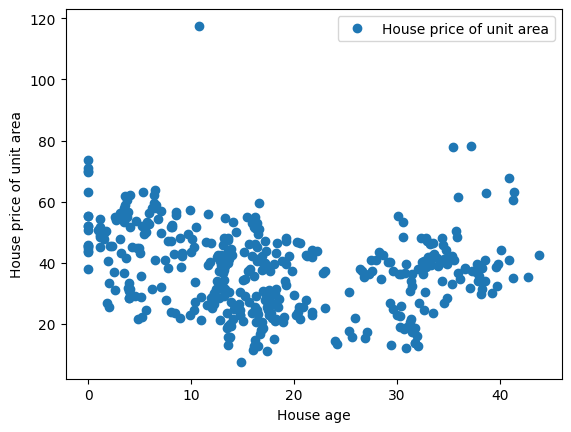

In [7]:
# This is to visualize the data of number of words and shares
# This shouldnt look like a good linear plot. Though we will 
# use this for now.
data.plot(x='House age', y='House price of unit area', style='o')  
plt.xlabel('House age')  
plt.ylabel('House price of unit area')  
plt.show()

# Extract the Data Features (14 points)

Now, we are going to start with the two dimensional comparison of House age and House price per unit area. Store in the variable `selected_data` the new data frame with the columns of House age and House price per unit area.

In [9]:
#TODO
selected_data = data[['House age', 'House price of unit area']]


# raise NotImplementedError()
# selected_data = None

In [10]:
print(selected_data)

     House age  House price of unit area
0         32.0                      37.9
1         19.5                      42.2
2         13.3                      47.3
3         13.3                      54.8
4          5.0                      43.1
..         ...                       ...
409       13.7                      15.4
410        5.6                      50.0
411       18.8                      40.6
412        8.1                      52.5
413        6.5                      63.9

[414 rows x 2 columns]


# Train and Test Split (14 points)

Now we need to split the data for training and testing. Training data will be used to build our regression model, and testing will be to used how good our model is. Never touch the testing data until the very end. Use a 20% test to train split ratio. Recall `pd.dataFrame.drop()`

So here, we need 4 variables with the respective data split. x_train, y_train, x_test, y_test.

In [11]:
#TODO
X = selected_data.drop('House price of unit area', axis=1)   # only "House age"
y = selected_data['House price of unit area']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# raise NotImplementedError()
# x_train, x_test, y_train, y_test = (None, None, None, None)

In [12]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("Percentage of split: {}%".format(100 * x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))

(331, 1) (331,) (83, 1) (83,)
Percentage of split: 20.04830917874396%


# Build a Linear Regression Model using sklearn (14 points)

Build a function called `generateModel` that when given a tuple of training data, it fits a linear model to the data. It should return the `LinearRegression` object from `sklearn`. Note, it must be fitted to some given data, and must return the model. We will use this function to fit our data. The paramters passed are `x,y` , where x is the dependent variables in the model and y is the target variable.

In [13]:
# YOUR CODE HERE
# raise NotImplementedError()
# def generateModel(x,y):
#     #TODO - Return Type = sklearn.linear_model.LinearRegression
#     return None
# YOUR CODE HERE
def generateModel(x, y):
    model = LinearRegression()
    model.fit(x, y)          # fit the model
    return model             # return the fitted model

In [14]:
# This test prints the equation of your model.

regressor = generateModel(x_train, y_train)

eq = "House price of unit area = "
i = 0
for col in x_train.columns:
    eq += str(regressor.coef_[i])[:8] + "({}) + ".format(col)
    i+=1
eq += str(regressor.intercept_)[:8]

print(eq)

House price of unit area = -0.25978(House age) + 42.88289


# Predict Values for Test Set Using Regression Model and Reports the Square Error(14 points)

Now that we have a working LinearRegression model, we can start using it to spit outputs and measure how good it is. Create two variables called `predicted_values` and `error`. 

`predicted_values` should hold the values predicted for the test set.
`error` should measure the Mean Square Error of our predictions.

In [15]:
#TODO
# YOUR CODE HERE
# raise NotImplementedError()
# predicted_values = None
# error = None

regressor = generateModel(x_train, y_train)

predicted_values = regressor.predict(x_test)

error = metrics.mean_squared_error(y_test, predicted_values)

MSE: 165.2051150828318


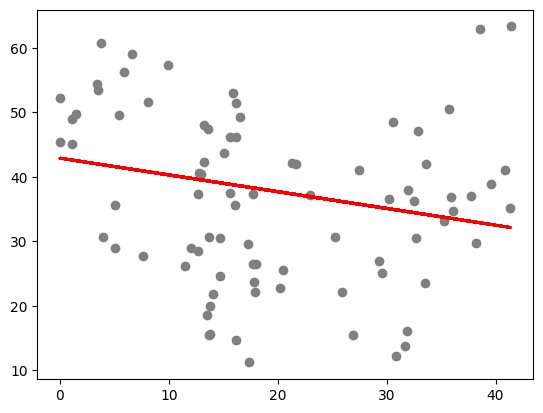

In [16]:
#This tests your predictions and visualizes them
print("MSE: {}".format(error))

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, predicted_values, color='red', linewidth=2)
plt.show()

# Higher Dimensional Regression (30 points)

As we can see, the linear fit isnt quite good enough. For the purpose of this assignment, we want you to practice working with the coding language and fitting different parameters. One option is indeed to remove the outlier contributing to the big MSE, which would suffice, but lets assume we can't do that. Then We either need a different fit, or different dimensions to compare. Lets do the latter. We can extend everything now to a higher dimensional situation. We can include more parameters, or different ones. Lets use the former: more parameters (which also means different, technically).

For this, you will rebuild everything but now with a deeper LinearRegression model. You've done all the steps already, you'll just have to make small tweeks. Do not resplit the data. While there is a thing called validation split, we will not be doing this. You are however advised to look up what validation splitting is, as in practice we have train/validation/test split. 

If you resplit the data between train/test each time for repetitive testing, then you are losing the testing set. One option is to always split such that you use the LAST 20% of the data as test, but that is statistically invalid since you incorporate some bias - it must be random. Thus, you are just doing a train/validation set and over fitting your model highly. 

Therefore, you need to figure out how to add back in the columns to your x_train and x_test. As a hint, notice how (if you truly did the splitting correctly) each data entry has an index tag. These tags can be used to lookup the original data dataframe and pull the extra columns. You may need to refer to extra documentation for this. Like most things in computer science, feel free to research as much as you need!



Please make the following variables. 
`hd_x_train` - the column updated training data

`hd_x_test` - the column updated test data

`hd_model` - the `LinearRegression` model with greater than 2 dimensions.

`hd_predictions` - the predicted values of this new model

`hd_error` - the MSE of the higher dimensional model

`hd_features` - a list of strings of the features (columns) used for the dependent variables. The target is still Housing price of unit area.


In [21]:
#TODO
# YOUR CODE HERE
# raise NotImplementedError()
hd_x_train = None
hd_x_test = None
hd_model = None
hd_predictions = None
hd_error = None
hd_features = None

# This prints the EXACT column names — copy-paste from here!
print(data.columns.tolist())


# 1. Get all features except the target and the useless "No" column
hd_features = [
    'House age',
    'Distance to the nearest MRT station',   # ← this is the correct one in your file
    'Number of convenience stores',
    'Latitude',
    'Longitude'
]

# Reconstruct the full-feature X matrices using the same row indices from the earlier split
hd_x_train = data.loc[x_train.index, hd_features]
hd_x_test  = data.loc[x_test.index,  hd_features]

# Train the new multi-feature model
hd_model = LinearRegression()
hd_model.fit(hd_x_train, y_train)

# Make predictions and calculate MSE
hd_predictions = hd_model.predict(hd_x_test)
hd_error = metrics.mean_squared_error(y_test, hd_predictions)

# (Optional – makes the tester cell happier)
print("Features used:", hd_features)
print("Higher-dimensional MSE:", hd_error)

['No', 'Transaction date', 'House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']
Features used: ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
Higher-dimensional MSE: 54.58094520086248


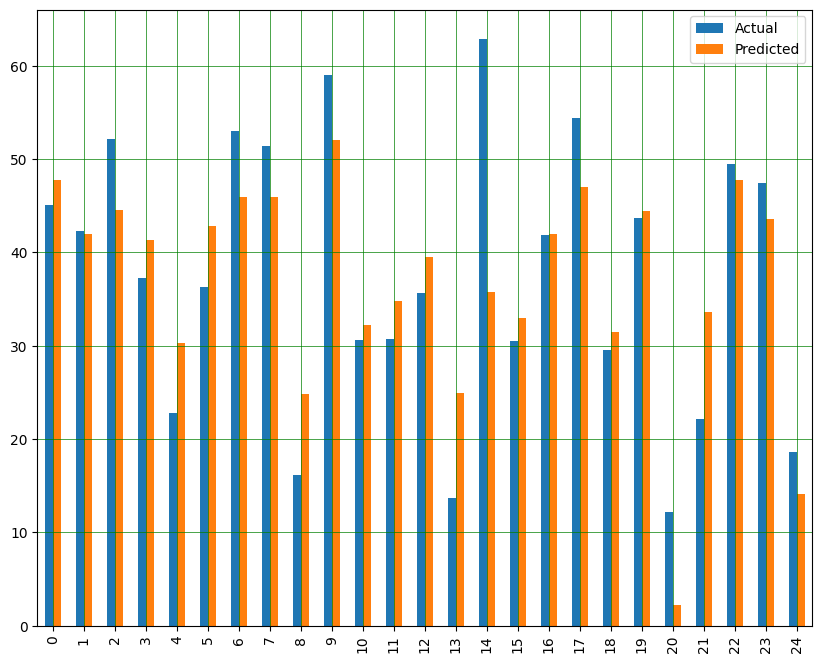

In [22]:

#Use this if you want to visiualize your data. It might be wise to see how well you feel your MSE is.
regressor, y_pred, err, cols= (hd_model, hd_predictions, hd_error, hd_features)
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}) #A new data frame between test and predictions
df1 = df.head(25) #The number indicates how many of the first predicitons to compare to true values.
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()